# Getting the most solar power for your dollar
## Exploratory Data Analysis
### Zachary Brown

The data has been cleaned and preliminary analysis has identified some trends we should expect to see the eventual model pick up on. Now I'm going to preprocess the data so that any models I work with can use the data appropriately. This will include imputing missing data, feature engineering, scaling, and splitting the data into testing and training datasets.

I'll start by loading the necessary packages and reading in the data from the exploratory data analysis portion of the project.

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme('notebook')
from sklearn.model_selection import train_test_split

In [2]:
print(os.getcwd())
os.chdir(r"..\data\processed")
print(os.getcwd())

C:\Users\Zachary Brown\Documents\GitHub\Solar-Panel-Capstone\notebooks
C:\Users\Zachary Brown\Documents\GitHub\Solar-Panel-Capstone\data\processed


In [26]:
data = pd.read_csv('processed_data.csv', index_col=0, low_memory=False)
data.shape

(208257, 57)

In [27]:
data.columns.groupby(data.dtypes)

{int64: ['expansion_system', 'multiple_phase_system', 'tracking', 'ground_mounted', 'third_party_owned', 'self_installed', 'module_quantity_1', 'additional_modules', 'bipv_module_1', 'bifacial_module_1', 'additional_inverters', 'micro_inverter_1', 'solar_storage_hybrid_inverter_1', 'built_in_meter_inverter_1', 'dc_optimizer', 'year', 'month', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DE', 'state_FL', 'state_MA', 'state_MD', 'state_MN', 'state_NH', 'state_NM', 'state_NY', 'state_RI', 'state_TX', 'state_UT', 'state_WI'], float64: ['system_size_dc', 'total_installed_price', 'rebate_or_grant', 'azimuth_1', 'tilt_1', 'nameplate_capacity_module_1', 'efficiency_module_1', 'inverter_quantity_1', 'inverter_loading_ratio', 'price_per_kw'], object: ['data_provider_1', 'system_id_1', 'installation_date', 'customer_segment', 'zip_code', 'city', 'utility_service_territory', 'installer_name', 'module_manufacturer_1', 'module_model_1', 'technology_module_1', 'inverter_manufacturer_1', 'in

Since I only broke out month and year of the battery installation for the non-null dataframe in the last notebook, I'll create those columns in this dataframe so we can work with that data. I'll then have to impute the missing values.

In [28]:
data['date_of_battery_install'] = pd.to_datetime(data['date_of_battery_install'])

Although I removed columns with high percentages of missing data, I only checked for -1, not nulls. I'm going to recheck this column before going any further to make sure I have enough data to work with this feature.

In [29]:
data['date_of_battery_install'].isnull().sum()
print((data['date_of_battery_install'].isnull().sum()/len(data['date_of_battery_install']))*100,\
      '% of values in battery installation date are null')

93.65063359214815 % of values in battery installation date are null


Ok, unfortunately this column is over 90% missing, so it won't be much help in my modeling. I'll recheck the rest of the features to make sure there are no others I've missed.

In [30]:
percent_missing = data.isnull().sum()/len(data)*100
percent_missing.sort_values(ascending=False)

date_of_battery_install            93.650634
nameplate_capacity_module_1         0.193511
inverter_quantity_1                 0.000480
state_CA                            0.000000
additional_inverters                0.000000
micro_inverter_1                    0.000000
solar_storage_hybrid_inverter_1     0.000000
built_in_meter_inverter_1           0.000000
dc_optimizer                        0.000000
inverter_loading_ratio              0.000000
year                                0.000000
month                               0.000000
price_per_kw                        0.000000
state_AZ                            0.000000
data_provider_1                     0.000000
inverter_model_1                    0.000000
state_CT                            0.000000
state_DE                            0.000000
state_FL                            0.000000
state_MA                            0.000000
state_MD                            0.000000
state_MN                            0.000000
state_NH  

Alright, so that's the only one that needs to be removed due to null values. Since I'm only delving into the state level, not any smaller, I'm going to remove the city and zip code columns as well. The rest I'll just need to adjust for modeling.

In [31]:
data=data.drop(columns=['date_of_battery_install', 'zip_code', 'city'])

Next I want to browse the object columns and count how many unique values each has. If a feature has too many unique values they won't help identify any trends.

In [43]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col, ' : ', data[col].nunique())

data_provider_1  :  22
system_id_1  :  200023
installation_date  :  530
customer_segment  :  1
utility_service_territory  :  72
installer_name  :  2641
module_manufacturer_1  :  157
module_model_1  :  2460
technology_module_1  :  7
inverter_manufacturer_1  :  64
inverter_model_1  :  629


Based on these results it should be safe to remove system_id_1, as that has a unique value for almost every entry. I'll also drop customer_segment since earlier in the project I limited the dataset to only residential installations. 

In [44]:
data = data.drop(columns=['system_id_1', 'customer_segment'])

Great! Now I need to encode these categorical features as I did with the states earlier. 

It's important that any data imputation and scaling be performed on the training dataset, then applied to the test dataset, so now that all of the desired features have been created I'll split the data into test and train sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, data['price_per_kw'], test_size=0.25)

Now I need to check the numeric columns to see if they have -1 for missing data, then decide how best to replace those for the modeling.

In [32]:
for col in X_train.columns:
    if X_train[col].dtypes != 'object':
        if (X_train[col] == -1).sum() != 0:
            print(col, ' : ', (X_train[col] == -1).sum())

tracking  :  45774
ground_mounted  :  57685
third_party_owned  :  15080
self_installed  :  12748
azimuth_1  :  46933
tilt_1  :  46884
module_quantity_1  :  29171
additional_modules  :  37960
bipv_module_1  :  22909
bifacial_module_1  :  22088
nameplate_capacity_module_1  :  22088
efficiency_module_1  :  25051
inverter_quantity_1  :  29233
additional_inverters  :  37960
micro_inverter_1  :  24221
solar_storage_hybrid_inverter_1  :  35490
built_in_meter_inverter_1  :  24221
dc_optimizer  :  22893
inverter_loading_ratio  :  44297


First I'll work through categorical numerical columns to check the distributions and determine how best to impute the missing values.

In [33]:
X_train[['self_installed', 'tracking', 'ground_mounted', 'third_party_owned', 'bipv_module_1', 'bifacial_module_1',\
      'additional_inverters', 'additional_modules', 'dc_optimizer', 'micro_inverter_1', 'built_in_meter_inverter_1',\
      'solar_storage_hybrid_inverter_1']].apply(pd.Series.value_counts)

,self_installed,tracking,ground_mounted,third_party_owned,bipv_module_1,bifacial_module_1,additional_inverters,additional_modules,dc_optimizer,micro_inverter_1,built_in_meter_inverter_1,solar_storage_hybrid_inverter_1
-1,12748,45774,57685,15080,22909,22088,37960,37960,22893,24221,24221,35490
0,192182,161854,147761,125624,184901,185871,170284,168677,98348,97724,98847,167074
1,3327,629,2811,67553,447,298,13,1620,87016,86312,85189,5693


Many of these columns are already heavily skewed, so for those I'll impute the missing values using the median and assign the missing values to the more heavily favored response.

In [34]:
cols = ['self_installed', 'tracking', 'ground_mounted', 'bipv_module_1', 'bifacial_module_1',\
        'additional_inverters', 'additional_modules', 'solar_storage_hybrid_inverter_1']
X_train[cols] = X_train[cols].replace({-1:0})

### Columns left to deal with: third_party_owned, dc_optimizer, micro_inverter_1, built_in_meter_inverter_1. 

Now that the categorical numerical features have been taken care of I'll recheck what continuous numerical variables are left to clean up.

In [35]:
for col in X_train.columns:
    if X_train[col].dtypes != 'object':
        if (X_train[col] == -1).sum() != 0:
            print(col, ' : ', (X_train[col] == -1).sum())

third_party_owned  :  15080
azimuth_1  :  46933
tilt_1  :  46884
module_quantity_1  :  29171
nameplate_capacity_module_1  :  22088
efficiency_module_1  :  25051
inverter_quantity_1  :  29233
micro_inverter_1  :  24221
built_in_meter_inverter_1  :  24221
dc_optimizer  :  22893
inverter_loading_ratio  :  44297


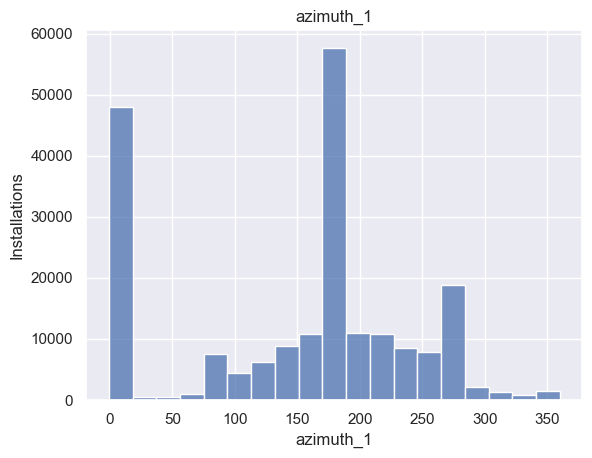

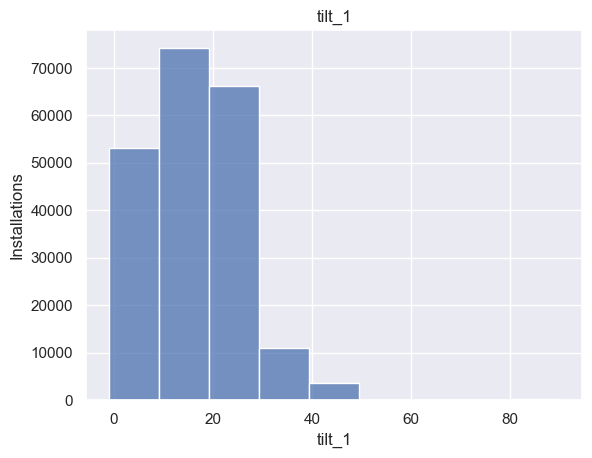

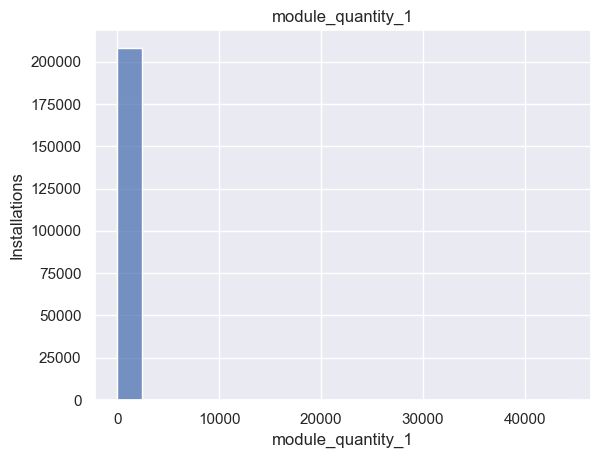

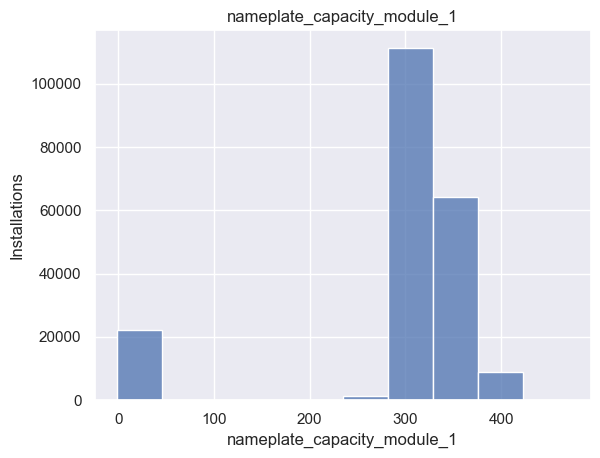

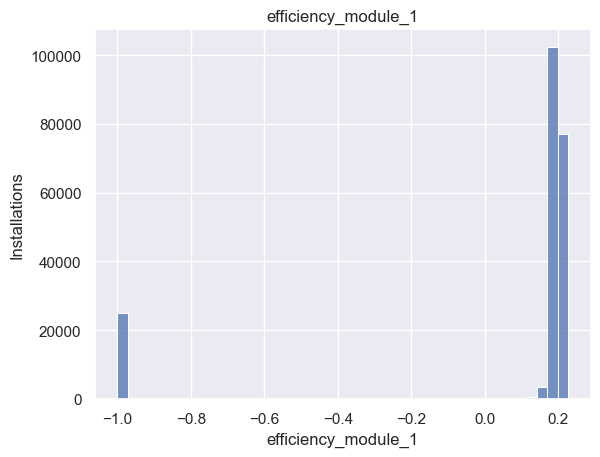

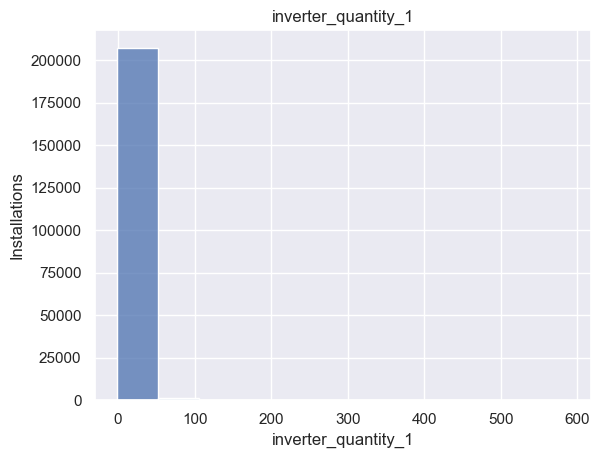

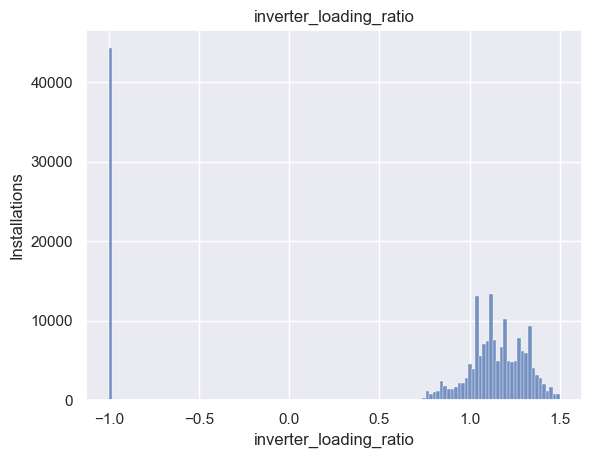

In [36]:
cols = ['azimuth_1', 'tilt_1', 'module_quantity_1', 'nameplate_capacity_module_1',\
        'efficiency_module_1', 'inverter_quantity_1',\
        'inverter_loading_ratio']
for col in X_train[cols]:
    bins=round(np.sqrt(len(data[col].unique())))
    sns.histplot(data=X_train[col], bins=bins)
    plt.title(col)
    plt.ylabel('Installations')
    plt.xlabel(col)
    plt.show()

 0    97724
 1    86312
-1    24221
Name: micro_inverter_1, dtype: int64